In [2]:
# Setting html stuff for the rest of the notebook
from IPython.core.display import display, HTML, Javascript
html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
    <style>

    .top_section{
        background-color: #00AF87;
        color: white;
        font-family: Copperplate, Papyrus, fantasy;
        font-weight: 800;
        font-size: 35px;
        padding: 20px 14px;
        margin-bottom: 20px;
    }


    </style>
    </head>

</html>
"""

HTML(html_contents)

<center><strong><h1> <div class="top_section">In depth series 1: SENTIMENT ANALYSIS, why and how, EDA and solutions with Transformers</div></h1></strong></center>

In this study, I explained Sentiment Analysis in detail.

I chose a sample dataset for Sentiment Analysis and embodied the subject I explained on a real example.

Then I made a detailed analysis on the dataset and visualized it.

After preprocessing the data, I tried to complete the Sentimet Analysis task with state-of-the-art models.

I analyzed the results of this model and interpreted its outputs.

I have indicated the sources I used while doing this study at the end of the notebook.
Thank you to everyone who contributed to this field :).

<center><h1><div class="top_section">Table of Contents </div></h1></center>

1.  **[SENTIMENT ANALYSIS](#sentiment_analysis)**

    - [Types of Sentiment Analysis](#types_of_sentiment_analysis)
        - [Emotion Detection](#emotion_detection)
        - [Multilingual Sentiment Analysis](#multilingual_sentiment_analysis)
        - [Graded Sentiment Analysis](#graded_sentiment_analysis)
        - [Aspect-based Sentiment Analysis](#aspect_base_sentiment_analysis)
        - [Intent Analysis](#intent_analysis)
        
    - [Why Is Sentiment Analysis Important?](#why_is_sentiment_analysis_important)
    
    - [The overall benefits of sentiment analysis include](#the_overall_benefits_of_sentiment_analysis_include)
        - [Sorting Data at Scale](#the_overall_benefits_of_sentiment_analysis_include)
        - [Real-Time Analysis](#the_overall_benefits_of_sentiment_analysis_include)
        - [Discovering New Marketing Strategies](#the_overall_benefits_of_sentiment_analysis_include)
      
    - [How Does Sentiment Analysis Work?](#how_does_sentiment_analysis_work)
    
    - [Sentiment analysis Approaches](#sentiment_analysis_Approaches)
        - [Rule-based Approaches](#rule_based_approaches)
        - [Automatic Approaches](#automatic_approaches)
       
2.  **[EDA](#eda)**
       - [Information of the DATA](#information_of_the_data)
       - [Information of the Problem](#information_of_the_problem)
       - [Imports](#imports)
       - [Helper Functions](#helper_functions)
       - [Read Data](#read_data)
       - [Visualizations](#visualizations)
           - [Word Cloud](#word_cloud)
           - [Target Count](#target_count)
           - [Token Counts with simple tokenizer](#token_counts_with_simple_tokenizer)
           - [Token Counts with BERT tokenizer](#token_counts_with_BERT_tokenizer)
           - [Characters Count in the Data](#characters_count_in_the_data)
           - [Reviews Lengths](#reviews_lengths)
           - [Word Counts](#word_counts)
           - [Most Common Words](#most_common_words)
           - [Most Common ngrams](#most_common_ngrams)
3.  **[MODELS](#models)**
    - [A brief information about BERT](#brief_informartion_about_Bert)
    - [A brief information about XLNET](#brief_informartion_about_XLNET)
    - [A brief information about RoBERTa](#brief_informartion_about_RoBERTa)
    - [Comparison of Transformer Models](#comparison_of_Transformer_Models)
    - [Preprocess for BERT Train](#preprocess_for_BERT_Train)
    - [Train and Validation Split](#Train_and_Validation_Split)
    - [BertTokenizer and Encoding the Data](#BertTokenizer_and_Encoding_the1_Data)
    - [Creating the Model](#Creating_the_Model)
    - [Data Loaders](#Data_Loaders)
    - [Optimizer & Scheduler](#Optimizer_Scheduler)
    - [Performance Metrics](#Performance_Metrics)
    - [Training Loop](#Training_Loop)
    - [Test on validation set](#test)
4. **[ERROR ANALYSIS](#error_analysis)**
5. **[INFERENCE](#inference)**
5. **[REFERENCES](#references)**


    




    

        
        



<a id="sentiment_analysis"></a>

<center><h1><div class="top_section">1. SENTIMENT ANALYSIS</div></h1></center>

<img src="https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/sentimentanalysishotelgeneric-2048x803-1.jpg">
                
                    source = https://d3caycb064h6u1.cloudfront.net/wp-content/uploads/2021/06/sentimentanalysishotelgeneric-2048x803-1.jpg


Sentiment analysis (or opinion mining) is a natural language processing (NLP) technique used to determine whether data is positive, negative or neutral. Sentiment analysis is often performed on textual data to help businesses monitor brand and product sentiment in customer feedback, and understand customer needs.

Sentiment analysis helps data analysts within large enterprises gauge public opinion, conduct nuanced market research, monitor brand and product reputation, and understand customer experiences. In addition,  companies often develop sentiment analysis systems for customer experience management, social media monitoring, or workforce analytics platform to about their own customers.

<a id="types_of_sentiment_analysis"></a>
<strong><h2>Types of Sentiment Analysis</h2></strong>

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/Sentiments-analysis_types.png)
                
                source = https://mobcoder.com/blog/sentimental-analysis-how-the-phenomenon-changing-the-dynamics-of-brand-monitoring/

Sentiment analysis is aimed at determining the general emotional state of a text. One of these cases focuses on the polarity of a text (positive, negative, neutral) but it also goes beyond polarity to detect specific feelings and emotions (angry, happy, sad, etc), urgency (urgent, not urgent) and even intentions (interested v. not interested).

Let's explain them in more detail

<a id="emotion_detection"></a>

**Emotion Analysis**

<img src="https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/emotions_boy.jpg" width="800">

            source = https://kids.frontiersin.org/articles/10.3389/frym.2018.00015

The type of emotion analysis in which emotion types(happiness, frustration, anger, and sadness) are classified is called **emotion detection.**

There are some difficulties with this classification. Users can express their feelings with many different words. They can use a word with a bad meaning for happiness. The most difficult examples of classification models here are; For example, the sentence "I connect to customer service too late, it's killing me" is a negative sentence, while the sentence "you are killing me" is positive.

<a id="multilingual_sentiment_analysis"></a>


**Multilingual Sentiment Analysis**


It is the version of Sentiment Analysis systems that provides multi-language support. What is mentioned here is to do sentiment analysis in more than one language.

I usually have two suggestions for this:

My first suggestion is to detect the language of the text with the language classifier and run a sentimen analysis model suitable for this language. The second method is to develop a Multilingual language model and finetune this model and make the model work in many languages.



<a id="#graded_sentiment_analysis"></a>

**Graded Sentiment Analysis**

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/gradient_Sentiment.png)
            
            source = https://i.pinimg.com/originals/5b/7d/62/5b7d62fb62b03b8142b402cb85644865.png

If the precision of the mood is important, the categories can be further elaborated. A broader classification can be made, not just positive and negative:

* Very positive
* Positive
* Neutral
* Negative
* Very negative


This classification is often used in reviews and reviews where 5 stars are awarded.

* Very Positive = 5 stars
* Very Negative = 1 star


<a id="aspect_base_sentiment_analysis"></a>

**Aspect-based Sentiment Analysis**

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/aspectbase.png)

        source = https://www.surveysensum.com/wp-content/uploads/2020/02/SENTIMENT-09-1.png

Generally, when analyzing the emotions of the texts, the focus is on determining whether the comment/opinion is positive or negative. But we do not focus on what is positive or negative in this text.

To put it more clearly, in the expression "I did not like the product at all, the size is too small", the user is not satisfied with the product and complains about its dimensions. In a normal sentiment analysis, this sentence is classified as negative, but in **aspect-based sentiment analysis**, the "the size is too small" part is also focused on.

<a id="intent_analysis"></a>

**Intent Analysis**

Intent analysis focuses on what the user wants to do. Understanding what the user wants to do will allow us to better guide him.

For example, being able to understand that a customer browsing an e-commerce site has a shopping intention also allows us to offer him the right products.

One of the most used areas is the smart assistant systems in the applications. It allows us to direct users to the right places within the application in line with their requests and we can offer a better application experience to the user.


<a id="why_is_sentiment_analysis_important"></a>


**Why Is Sentiment Analysis Important?**

![](https://brand24.com/blog/wp-content/uploads/2017/09/36896473_m-640x300.jpg)

                    source = https://brand24.com/

People now share their comments/emotions on social media, e-commerce sites and many other sites. A lot of data is created on these platforms.

Often brands want to know what they are talking about. Brands/companies make great efforts to quickly identify their customers' expectations and provide them with the right service.It allows their customers to learn what makes them happy or disappointed so they can tailor products and services to their customers' needs.
In addition, brands want to observe the impact of their advertisements on users.

For these reasons, Sentiment analysis is becoming more important every day.

<a id="the_overall_benefits_of_sentiment_analysis_include"></a>

**The overall benefits of sentiment analysis include:**

**Sorting Data at Scale**

Users make a lot of comments about brands, it is almost impossible to process them manually. Sentiment analysis enables businesses to automatically classify large amounts of raw data.


**Real-Time Analysis**

Companies can learn the wishes of their customers by analyzing the social media comments about you in real time. They can identify the angry customer and ensure his satisfaction.

**Discovering New Marketing Strategies**

With more data and information gathered through sentiment analysis, the organizations could develop an effective marketing strategy.

The outcome from the strategies can be measured from the customers’ positive or negative key messages.

By observing the customers’ conversations on their social media and detect the specific key messages related to your brand, specific marketing campaigns can be designed for the target consumers.

<a id="how_does_sentiment_analysis_work"></a>


**How Does Sentiment Analysis Work?**

<img src="https://monkeylearn.com/static/30607381159c995d7e967c1f0530e50f/95a1e/how-does-sentiment-analysis-work%402x.webp" width="600">
                    
                        source = https://monkeylearn.com/sentiment-analysis/


Sentiment analysis works to automatically determine emotional tone thanks to natural language processing (NLP), rule-based methods, and machine learning algorithms.

There are different ways we can do sentiment analysis, depending on how much data you need to analyze, how accurate your model needs to be, and how many resources you have.

We will talk about some of them below.



<a id="sentiment_analysis_Approaches"></a>

**Sentiment analysis algorithms fall into one of three buckets:**

* <strong>Rule-based:</strong> these systems automatically perform sentiment analysis based on a set of manually crafted rules.
* <strong>Automatic:</strong> systems rely on machine learning techniques to learn from data.


**Rule-based Approaches**

Usually, a rule-based system tries to help determine the subjectivity of the sentence, the polarity, or the subject matter of an idea. The most used tool here is "regex".

These rules usually include the following two NLP techniques:

* Stemming, tokenization, part-of-speech tagging and parsing.
* Lexicons (i.e. lists of words and expressions).


The working mechanism of these systems is briefly as follows;

1. Build a list of polarized words (e.g. bad-good, worst-best, ugly-beautiful etc). You can find them as open source

2. The ratio of positive and positive words in a sentence

Rule-based approaches are now obsolete, not used as much as they used to be. Rule-based approaches fail to detect ironies, not exactly how users are feeling. For this reason, automated approaches are gaining more importance now.





<a id="automatic_approaches"></a>

**Automatic Approaches**

These systems don’t rely on manually crafted rules, but on machine learning techniques, such as classification. Classification, which is used for sentiment analysis, is an automatic system that needs to be fed sample text before returning a category, e.g. positive, negative, or neutral.

Here’s how a machine learning classifier can be implemented:



**Classification Algorithms**

The classification step usually involves a statistical model like Naïve Bayes, Logistic Regression, Support Vector Machines, or Neural Networks:

* <strong>Naïve Bayes:</strong> are a family of simple "probabilistic classifiers" based on applying Bayes' theorem with strong (naïve) independence assumptions between the features (see Bayes classifier).
* <strong>Linear Regression:</strong> is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables).
* <strong>Support Vector Machines(SVM):</strong> is a supervised machine learning algorithm that can be used for classification or regression problems. However, it is mostly used in classification problems. Support Vector Machine is a boundary that best separates two classes (hyperplane/line)
* <strong>Deep Learning:</strong> (also known as deep structured learning) is part of a broader family of machine learning methods based on artificial neural networks with representation learning. Learning can be supervised, semi-supervised or unsupervised.

**We can explain the sentiment analysis in general like this. Now we have determined a data for how we will apply it next, and we will spread visualizations on that data and train models.**

<a id="eda"></a>
<strong><center><h1><div class="top_section">2. EDA</div></h1></center></strong>


<a id="information_of_the_data"></a>

<strong><h1> Information of the Data </h1></strong>

Hotels play a crucial role in traveling and with the increased access to information new pathways of selecting the best ones emerged.
With this dataset, consisting of 20k reviews crawled from Tripadvisor, you can explore what makes a great hotel and maybe even use this model in your travels!

<b>How to use</b>
* Predict Review Rating
* Topic Modeling on Reviews
* Explore key aspects that make hotels good or bad

<a id="information_of_the_problem"></a>

<strong><h1> Information of the Problem </h1></strong>

Customer satisfaction is very important for the service industry. For this reason, it is necessary to determine the emotional state of the customer's thoughts. We need to classify the user's emotion in our hotel reviews data.



<a id="imports"></a>

<strong><h1>Imports</h1></strong>

In [3]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt



In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopWords_nltk = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


<a id="helper_functions"></a>

<strong><h1>Helper Functions</h1></strong>

In [6]:
import re
from typing import Union, List

class CleanText():
    """ clearing text except digits () . , word character """

    def __init__(self, clean_pattern = r"[^A-ZĞÜŞİÖÇIa-zğüı'şöç0-9.\"',()]"):
        self.clean_pattern =clean_pattern

    def __call__(self, text: Union[str, list]) -> List[List[str]]:

        if isinstance(text, str):
            docs = [[text]]

        if isinstance(text, list):
            docs = text

        text = [[re.sub(self.clean_pattern, " ", sent) for sent in sents] for sents in docs]

        return text

def remove_emoji(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

def tokenize(text):
    """ basic tokenize method with word character, non word character and digits """
    text = re.sub(r" +", " ", str(text))
    text = re.split(r"(\d+|[a-zA-ZğüşıöçĞÜŞİÖÇ]+|\W)", text)
    text = list(filter(lambda x: x != '' and x != ' ', text))
    sent_tokenized = ' '.join(text)
    return sent_tokenized

regex = re.compile('[%s]' % re.escape(string.punctuation))

def remove_punct(text):
    text = regex.sub(" ", text)
    return text

clean = CleanText()


In [7]:
# label encode
def label_encode(x):
    if x == 1 or x == 2:
        return 0
    if x == 3:
        return 1
    if x == 5 or x == 4:
        return 2

# label to name
def label2name(x):
    if x == 0:
        return "Negative"
    if x == 1:
        return "Neutral"
    if x == 2:
        return "Positive"


<a id="read_data"></a>

<strong><h1>Read Data</h1></strong>

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
import pandas as pd

# Asegúrate de usar la ruta correcta a tu archivo
file_path = '/content/drive/MyDrive/M 1000 IA- equipo 1/basefinal.xlsx'

df = pd.read_excel(file_path)

In [18]:
# show column names
print("df.columns: ", df.columns)

df.columns:  Index(['Unnamed: 0.1', 'Unnamed: 0', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity', 'reviews', 'sentiment', 'year', 'month', 'day',
       'year_vuelo', 'month_vuelo', 'day_vuelo', 'Comment_cleaner', 'polarity',
       'review_len', 'word_count', 'Sentiment_polarity', 'clean_review'],
      dtype='object')


In [19]:
# head of df
df.head()

,Unnamed: 0.1,Unnamed: 0,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,day,year_vuelo,month_vuelo,day_vuelo,Comment_cleaner,polarity,review_len,word_count,Sentiment_polarity,clean_review
0,0,0,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,...,29,2024.0,4.0,1.0,lack responsibilityit really bad finding queue...,-0.291667,1305,206,0,lack responsibilityit really bad finding queue...
1,1,1,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,...,25,2024.0,4.0,1.0,classic rip booked paris beauvais poznan april...,-0.119444,637,90,0,classic rip booked paris beauvais poznan april...
2,2,2,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,...,22,2024.0,2.0,1.0,“refused book onto another flight”we know garb...,-0.333333,330,48,0,“refused book onto another flight”we know garb...
3,3,3,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),...,8,2024.0,4.0,1.0,“lost luggage direct flight”ryanair lost lugga...,-0.092105,730,99,0,“lost luggage direct flight”ryanair lost lugga...
4,4,4,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,...,8,2024.0,4.0,1.0,incompetent help passengersbooked basel dublin...,-0.148030,1654,242,0,incompetent help passengersbooked basel dublin...


In [20]:
# count of ratings
fig = px.histogram(df,
             x = 'Overall Rating',
             title = 'Histogram of Review Rating',
             template = 'ggplot2',
             color = 'Overall Rating',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             opacity = 0.8,
             height = 525,
             width = 835,
            )

fig.update_yaxes(title='Count')
fig.show()

In [21]:
# basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0.1            2262 non-null   int64  
 1   Unnamed: 0              2262 non-null   int64  
 2   Overall Rating          2131 non-null   float64
 3   Passenger Country       2262 non-null   object 
 4   Trip_verified           1318 non-null   object 
 5   Comment title           2262 non-null   object 
 6   Comment                 2262 non-null   object 
 7   Type Of Traveller       1648 non-null   object 
 8   Seat Type               2262 non-null   object 
 9   Origin                  1647 non-null   object 
 10  Destination             1647 non-null   object 
 11  Ground Service          1591 non-null   float64
 12  Value For Money         2261 non-null   float64
 13  Recommended             2262 non-null   object 
 14  Seat Comfort            2149 non-null   

In [38]:
df["Sentiment_polarity"].unique()

array([0, 1])

In [42]:
# Check unique values in the Sentiment_polarity column
print("Unique values in Sentiment_polarity:", df['Sentiment_polarity'].unique())

# Define label encoding functions
def label_encode(polarity):
    mapping = {1: 'Positive', 0: 'Negative'}
    if polarity not in mapping:
        raise ValueError(f"Unexpected value in Sentiment_polarity: {polarity}")
    return polarity

def label2name(label):
    mapping = {1: 'Positive', 0: 'Negative'}
    if label not in mapping:
        raise ValueError(f"Unexpected value in label: {label}")
    return mapping[label]

# Encode label and mapping label name
df["label"] = df["Sentiment_polarity"].apply(lambda x: label_encode(x))
df["label_name"] = df["label"].apply(lambda x: label2name(x))


Unique values in Sentiment_polarity: [0 1]


In [43]:
df.shape

(2262, 37)

In [48]:
df["label_name"].unique()

array(['Negative', 'Positive'], dtype=object)

<a id="visualizations"></a>


<strong><h1>Visualizations</h1></strong>

<a id="word_cloud"></a>

## Word Cloud

Word clouds generators work by breaking the text down into component words and counting how frequently they appear in the body of text. We can quickly obtain preliminary information about the data. We can understand what a dataset we don't know is talking about.

In [45]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        max_words=200,
        max_font_size=40,
        scale=1,
        random_state=1
).generate(" ".join(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

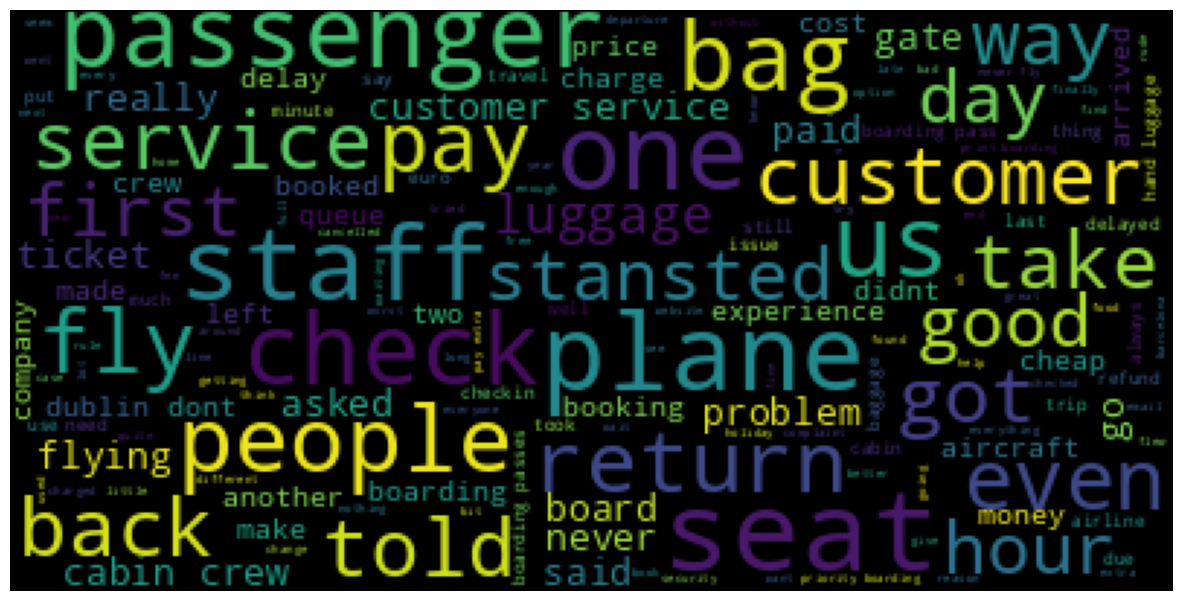

In [46]:
show_wordcloud(df["Review"].values)

<a id="target_count"></a>

## Target Count

How many targets do we have? Learning this information will give us an idea about the model we will build. It will also provide guidance on our methods of analyzing data.


In [36]:
df["label_name"].unique()

array([None, 'Negative'], dtype=object)

In [49]:
# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "bar"}]])

# Define colors
colors = ['gold', 'mediumturquoise']

# Add pie chart
fig.add_trace(go.Pie(labels=df['label_name'].value_counts().index,
                     values=df['label_name'].value_counts().values,
                     marker=dict(colors=colors, line=dict(color='#000000', width=2))),
              row=1, col=1)

# Add bar chart
fig.add_trace(go.Bar(x=df['label_name'].value_counts().index,
                     y=df['label_name'].value_counts().values,
                     marker_color=colors),
              row=1, col=2)

# Update traces for the pie chart
fig.update_traces(hoverinfo='label+percent', textfont_size=20, row=1, col=1)

# Show the figure
fig.show()

<a id="token_counts_with_simple_tokenizer"></a>

## Token Counts with simple tokenizer

Finding out the number of tokens available for each sample will give us information about the length of our data. The classification algorithm we will use for a long text will not be the same as the algorithm used for a short text.

In [50]:
# tokenize data
df["tokenized_review"] = df.Review.apply(lambda x: tokenize(x))
# calculate token count for any sent
df["sent_token_length"] = df["tokenized_review"].apply(lambda x: len(x.split()))

In [51]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [52]:
(df.sent_token_length < 512).mean()

1.0

<a id="token_counts_with_BERT_tokenizer"></a>

## Token Counts with BERT tokenizer

Since we will create a Transformers-based model, the value that BERT tokinezer will give us is very important. With the information here, the value of the `seq_len` parameter that we will use while encoding the data will be decided.

In [53]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased',
                                          do_lower_case=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [54]:
# data tokenize with bert tokenizer
df["sent_bert_token_length"] = df["Review"].apply(lambda x: len(tokenizer(x, add_special_tokens=False)["input_ids"]))

Token indices sequence length is longer than the specified maximum sequence length for this model (608 > 512). Running this sequence through the model will result in indexing errors


In [55]:
fig = px.histogram(df, x="sent_token_length", nbins=20, color_discrete_sequence=px.colors.cmocean.algae, barmode='group', histnorm="percent")
fig.show()

In [56]:
# Less than 512 covers how many of the data
(df.sent_bert_token_length < 512).mean()


0.9995579133510168

<a id="characters_count_in_the_data"></a>

## Characters Count in the Data

**Let's look at the frequency of the number of characters. It will give us information about the overall size of our data**

In [57]:
# valvulate char count for each review
df['char_count'] = df['Review'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    fig = plt.figure(constrained_layout=True, figsize=(18, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 )
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))


    plt.suptitle(f'{title}', fontsize=24)

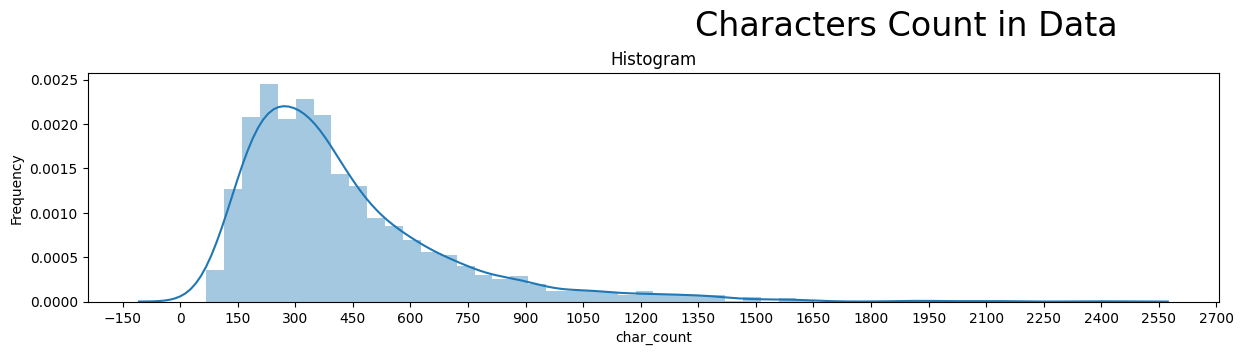

In [58]:
plot_dist3(df, 'char_count',
           'Characters Count in Data')

<a id="reviews_lengths"></a>

## Reviews Lengths


When we look at the number of characters per comment, it can give us very striking information about the data. Here, when we look at the length of the comments made by people according to their feelings, negative comments are shorter than neutral and positive comments. We can come to the notion that people simply express negative things :).

In [59]:
# Creating a new feature for the visualization.
df['Character Count'] = df['Review'].apply(lambda x: len(str(x)))


def plot_dist3(df, feature, title):
    # Creating a customized chart. and giving in figsize and everything.
    fig = plt.figure(constrained_layout=True, figsize=(24, 12))
    # Creating a grid of 3 cols and 3 rows.
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    # Customizing the histogram grid.
    ax1 = fig.add_subplot(grid[0, :2])
    # Set the title.
    ax1.set_title('Histogram')
    # plot the histogram.
    sns.distplot(df.loc[:, feature],
                 hist=True,
                 kde=True,
                 ax=ax1,
                 color='#e74c3c')
    ax1.set(ylabel='Frequency')
    ax1.xaxis.set_major_locator(MaxNLocator(nbins=20))

    # Customizing the ecdf_plot.
    ax2 = fig.add_subplot(grid[1, :2])
    # Set the title.
    ax2.set_title('Empirical CDF')
    # Plotting the ecdf_Plot.
    sns.distplot(df.loc[:, feature],
                 ax=ax2,
                 kde_kws={'cumulative': True},
                 hist_kws={'cumulative': True},
                 color='#e74c3c')
    ax2.xaxis.set_major_locator(MaxNLocator(nbins=20))
    ax2.set(ylabel='Cumulative Probability')

    plt.suptitle(f'{title}', fontsize=24)

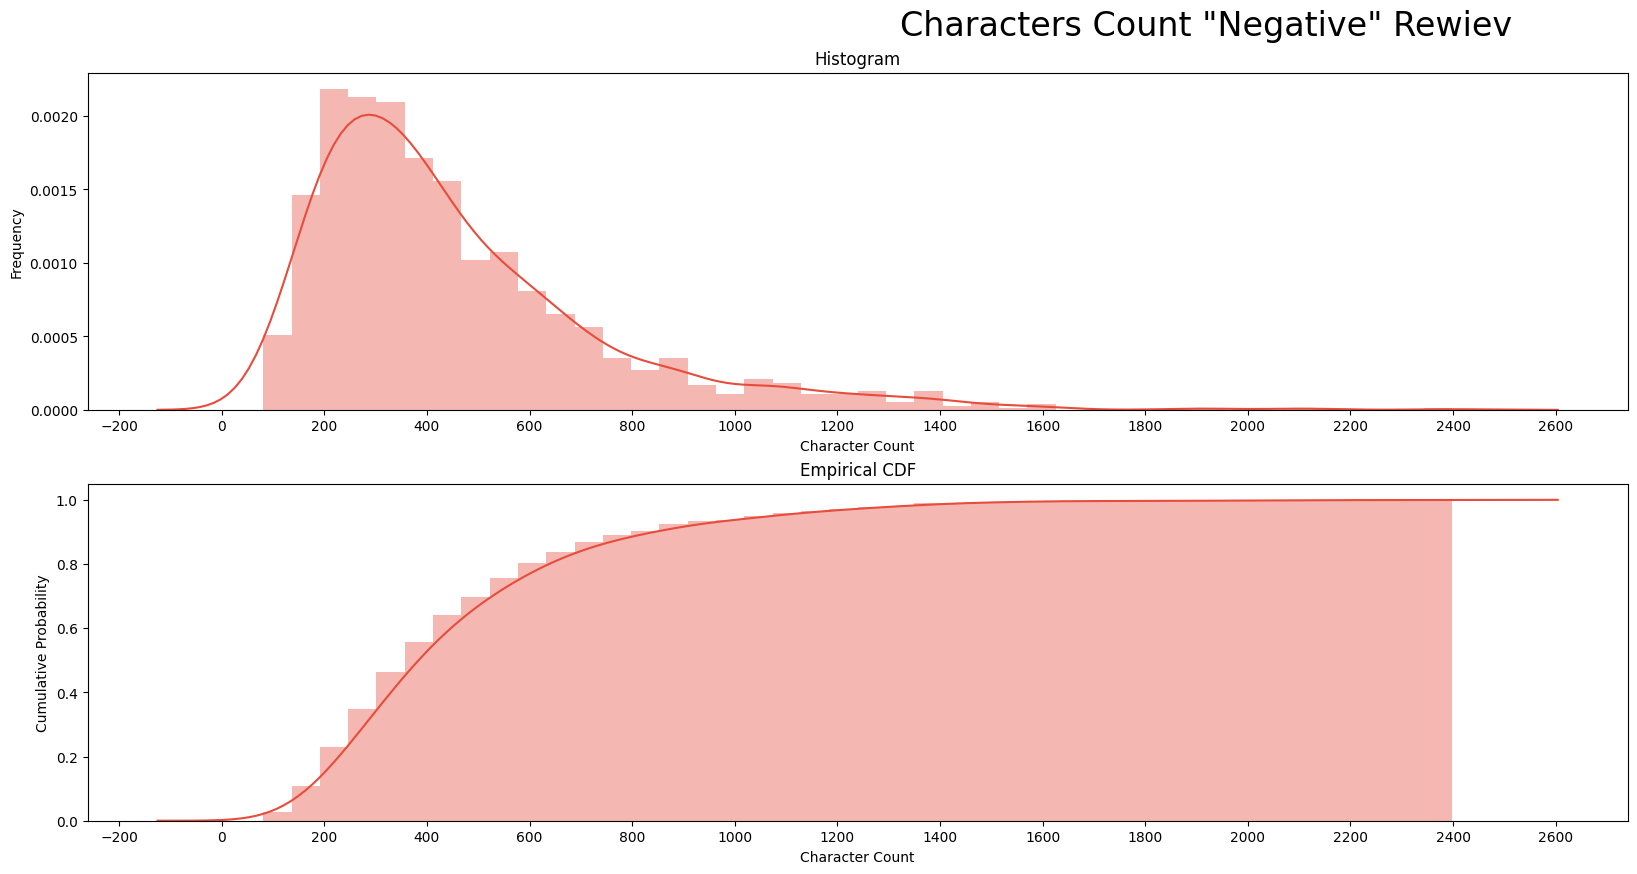

In [60]:
plot_dist3(df[df['label'] == 0], 'Character Count',
           'Characters Count "Negative" Rewiev')

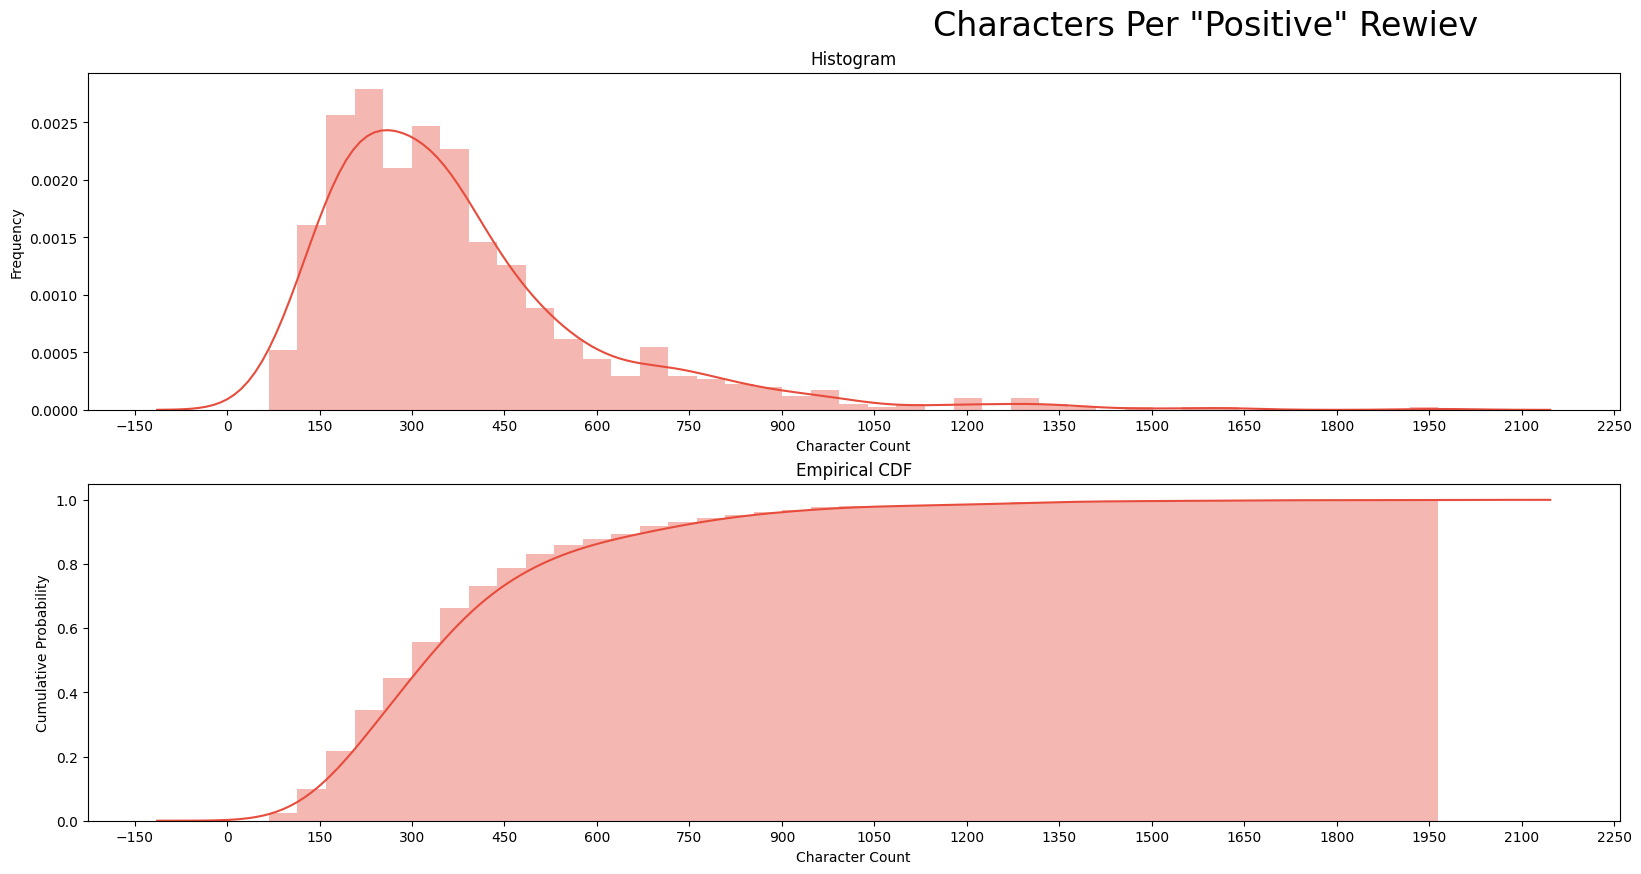

In [62]:
plot_dist3(df[df['label'] ==1], 'Character Count',
           'Characters Per "Positive" Rewiev')

<a id="word_counts"></a>

## Word Counts

We see that the situation in the number of characters and the situation in the number of words are the same. We have seen that people use less word count when expressing negative things.

In [71]:
def plot_word_number_histogram(textno, textye):

    """A function for comparing word counts"""

    fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(18, 12), sharey=True)
    sns.distplot(textno.str.split().map(lambda x: len(x)), ax=axes[0], color='#e74c3c')
    sns.distplot(textye.str.split().map(lambda x: len(x)), ax=axes[1], color='#e74c3c')


    axes[0].set_xlabel('Word Count')
    axes[0].set_ylabel('Frequency')
    axes[0].set_title('negative')
    axes[1].set_xlabel('Word Count')
    axes[1].set_title('positive')

    fig.suptitle('Words Per Review', fontsize=24, va='baseline')

    fig.tight_layout()

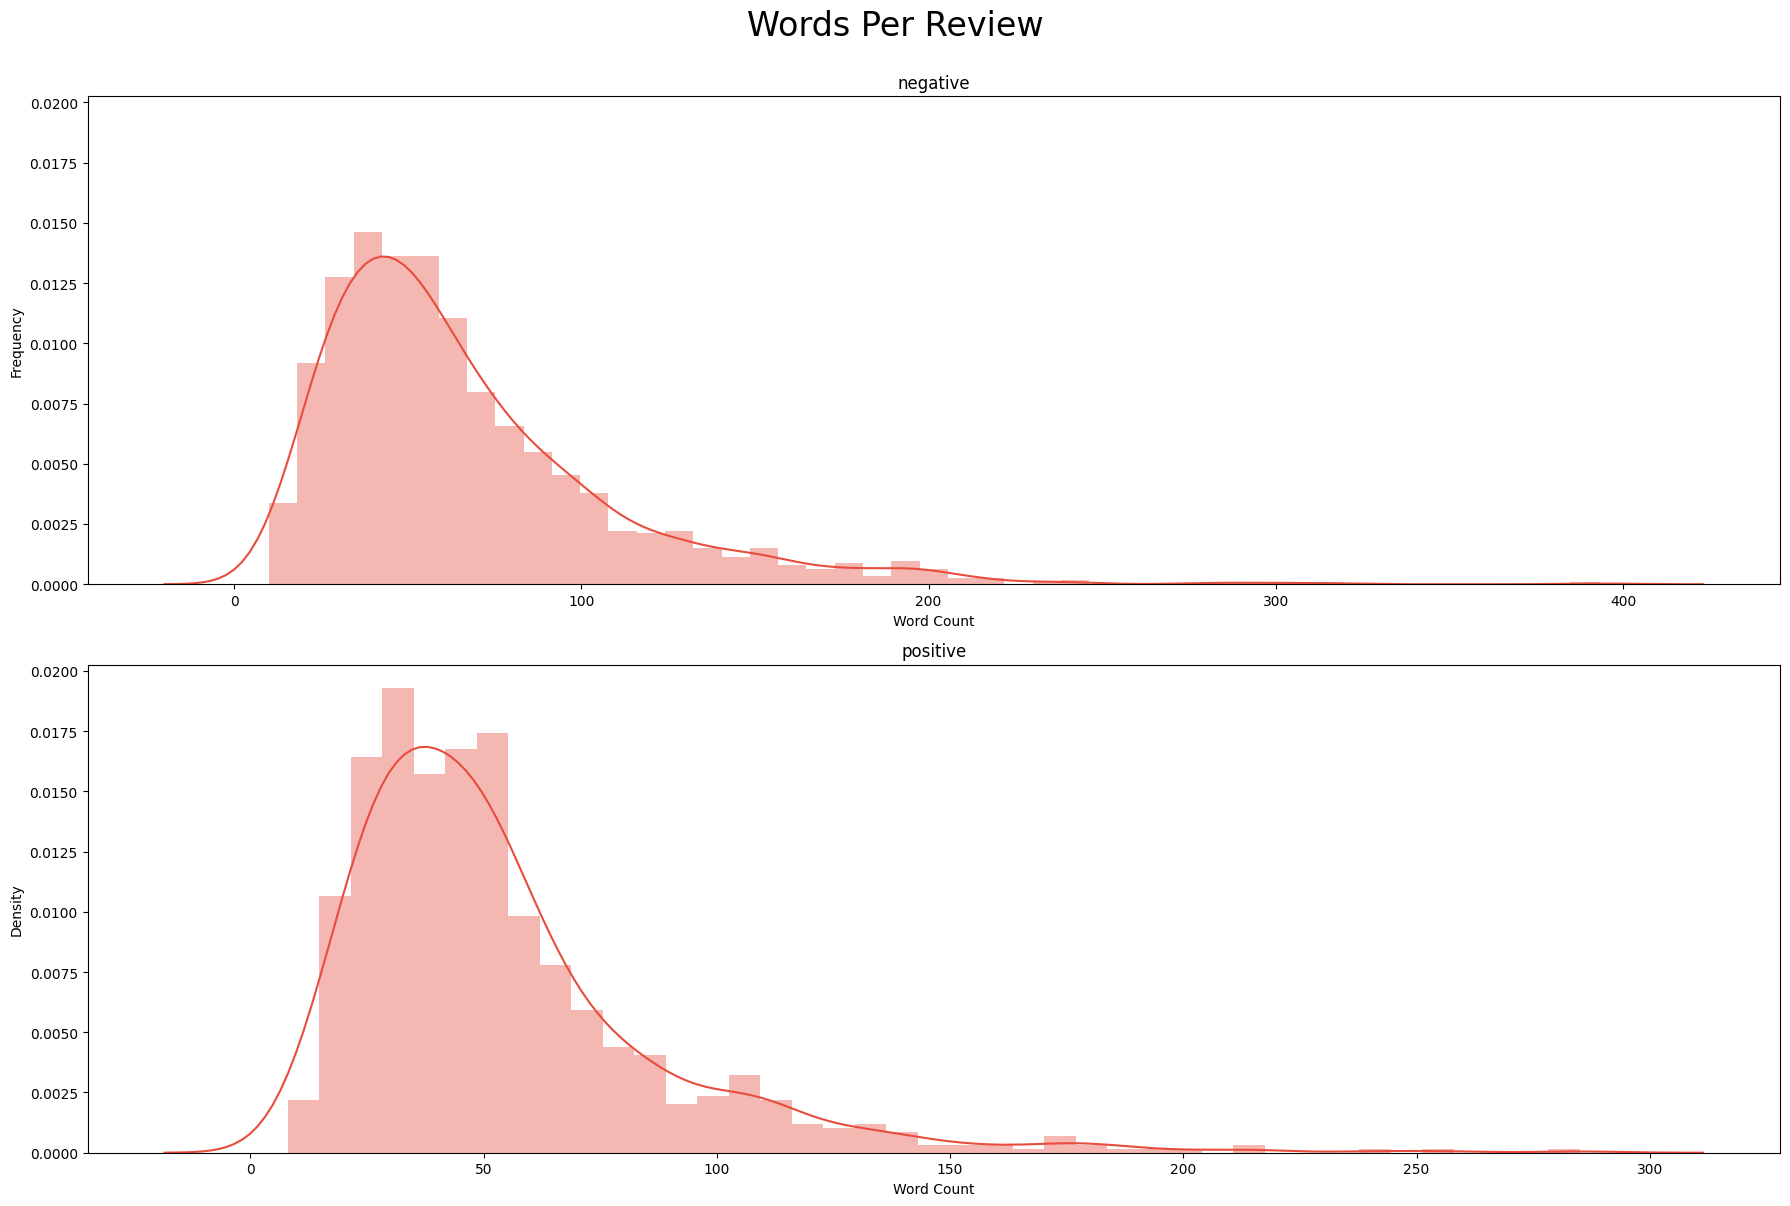

In [72]:
plot_word_number_histogram(df[df['label'] == 0]['Review'],
                           df[df['label'] == 1]['Review'])

In [73]:
# remove punk
df['tokenized_review'] = df['tokenized_review'].apply(lambda x: remove_punct(x))


<a id="most_common_words"></a>
## Most Common Words

In [74]:
texts = df['tokenized_review']
new = texts.str.split()
new = new.values.tolist()
corpus = [word for i in new for word in i]
counter = Counter(corpus)
most = counter.most_common()
x, y = [], []
for word, count in most[:30]:
    if word not in stopWords_nltk:
        x.append(word)
        y.append(count)

fig = go.Figure(go.Bar(
            x=y,
            y=x,
            orientation='h',  marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Most common Word',))

fig.update_layout( title={
        'text': "Most Common Words",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, font=dict(
        family="Courier New, monospace",
        size=18,
        color="RebeccaPurple"
    ))

fig.show()

<a id="most_common_ngrams"></a>

## Most Common ngrams

In [82]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from collections import Counter

# Define stop words
stopWords_nltk = set(["it", "is", "a", "the", "t"])  # Add more stop words as needed

# Define colors
colors = ['gold', 'mediumturquoise']

# Create subplots
fig = make_subplots(rows=1, cols=2)
title_ = ["Negative", "Positive"]

for i in range(2):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [word for sublist in new for word in sublist]
    counter = Counter(corpus)
    most = counter.most_common()
    x, y = [], []

    for word, count in most[:30]:
        if word not in stopWords_nltk:
            x.append(word)
            y.append(count)

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h',
                name=title_[i],
                marker=dict(color=colors[i])), 1, i+1)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,
    title=dict(
        text='<b>Most Common ngrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Courier New, monospace",
            size=24,
            color="RebeccaPurple"
        )
    )
)

fig.show()


In [78]:
def _get_top_ngram(corpus, n=None):
    #getting top ngrams
    vec = CountVectorizer(ngram_range=(n, n),
                          max_df=0.9,
                          ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:15]

In [83]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

# Function to get top n-grams
def _get_top_ngram(corpus, n=1):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=list(stopWords_nltk)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

# Define colors
colors = ['gold', 'mediumturquoise']

# Create subplots
fig = make_subplots(rows=1, cols=2)
title_ = ["Negative", "Positive"]

for i in range(2):
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [" ".join(text) for text in new]
    top_n_unigrams = _get_top_ngram(corpus, 1)[:15]
    x, y = map(list, zip(*top_n_unigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h',
                name=title_[i],
                marker=dict(color=colors[i])), 1, i+1)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,
    title=dict(
        text='<b>Most Common Unigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Courier New, monospace",
            size=24,
            color="RebeccaPurple"
        )
    )
)

fig.show()



In [86]:
# Define stop words as a list
stopWords_nltk = ["it", "is", "a", "the", "and", "to", "in", "that", "we", "for", "an", "are", "by", "be", "as", "on", "with", "can", "if", "from", "which", "but", "this", "at", "not", "have", "had", "they", "you", "was", "were", "or", "all", "any", "there", "so", "do", "one", "has", "been", "their", "would", "what", "will", "how", "did", "each", "them", "then", "some", "her", "she", "him", "into", "two", "up", "when", "use", "also", "these", "most", "its", "no", "other", "than", "our", "your", "who", "more", "about", "which", "out", "many", "such", "may", "like", "just", "should", "can", "now", "over", "know", "now", "been", "there"]

# Function to get top n-grams
def _get_top_ngram(corpus, n=1):
    vec = CountVectorizer(ngram_range=(n, n), stop_words=stopWords_nltk).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq

# Define colors
colors = ['gold', 'mediumturquoise']

# Create subplots
fig = make_subplots(rows=1, cols=2)
title_ = ["Negative", "Positive"]

for i in range(2):  # Change to range(2) to only iterate over two classes
    texts = df[df["label"] == i]['tokenized_review']

    new = texts.str.split()
    new = new.values.tolist()
    corpus = [" ".join(text) for text in new]

    # Ensure that the corpus is not empty
    if not corpus:
        print(f"No valid words found for class {title_[i]}")
        continue

    top_n_trigrams = _get_top_ngram(corpus, 3)[:15]

    # Ensure that top_n_trigrams is not empty
    if not top_n_trigrams:
        print(f"No trigrams found for class {title_[i]}")
        continue

    x, y = map(list, zip(*top_n_trigrams))

    fig.add_trace(go.Bar(
                x=y,
                y=x,
                orientation='h',
                name=title_[i],
                marker=dict(color=colors[i])), 1, i+1)

fig.update_layout(
    autosize=False,
    width=2000,
    height=600,
    title=dict(
        text='<b>Most Common Trigrams per Classes</b>',
        x=0.5,
        y=0.95,
        font=dict(
            family="Courier New, monospace",
            size=24,
            color="RebeccaPurple"
        )
    )
)

fig.show()

**We examined and visualized the data, now we can move on to the model building part.**

<a id="models"></a>
<strong><center><h1><div class="top_section">3. MODELS</div></h1></center></strong>


<a id="brief_informartion_about_Bert"></a>

<strong><h2>A brief information about BERT</h2></strong>


![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/bert_arch.png)

**BERT** makes use of Transformer, an attention mechanism that learns contextual relations between words (or sub-words) in a text. In its vanilla form, Transformer includes two separate mechanisms — an encoder that reads the text input and a decoder that produces a prediction for the task. Since BERT’s goal is to generate a language model, only the encoder mechanism is necessary.

BERT is a bi-directional transformer for pre-training over a lot of unlabeled textual data to learn a language representation that can be used to fine-tune for specific machine learning tasks. While BERT outperformed the NLP state-of-the-art on several challenging tasks, its performance improvement could be attributed to the bidirectional transformer, novel pre-training tasks of Masked Language Model and Next Structure Prediction along with a lot of data and Google’s compute power.

The detailed workings of Transformer are described in a paper by Google.

<a id="brief_informartion_about_XLNET"></a>

<strong><h2>A brief information about XLNET</h2></strong>
    
![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/xlnet.png)

**XLNet** is a large bidirectional transformer that uses improved training methodology, larger data and more computational power to achieve better than BERT prediction metrics on 20 language tasks.

To improve the training, XLNet introduces permutation language modeling, where all tokens are predicted but in random order. This is in contrast to BERT’s masked language model where only the masked (15%) tokens are predicted. This is also in contrast to the traditional language models, where all tokens were predicted in sequential order instead of random order. This helps the model to learn bidirectional relationships and therefore better handles dependencies and relations between words. In addition, Transformer XL was used as the base architecture, which showed good performance even in the absence of permutation-based training.

XLNet was trained with over 130 GB of textual data and 512 TPU chips running for 2.5 days, both of which ar e much larger than BERT.



<a id="brief_informartion_about_RoBERTa"></a>

<strong><h2>A brief information about RoBERTa</h2></strong>
    
**RoBERTa**. Introduced at Facebook, Robustly optimized BERT approach RoBERTa, is a retraining of BERT with improved training methodology, 1000% more data and compute power.

To improve the training procedure, RoBERTa removes the Next Sentence Prediction (NSP) task from BERT’s pre-training and introduces dynamic masking so that the masked token changes during the training epochs. Larger batch-training sizes were also found to be more useful in the training procedure.

Importantly, RoBERTa uses 160 GB of text for pre-training, including 16GB of Books Corpus and English Wikipedia used in BERT. The additional data included CommonCrawl News dataset (63 million articles, 76 GB), Web text corpus (38 GB) and Stories from Common Crawl (31 GB). This coupled with whopping 1024 V100 Tesla GPU’s running for a day, led to pre-training of RoBERTa.

<strong><h2>Comparison of Transformer Models</h2></strong>

![](https://raw.githubusercontent.com/mek12/detailed_sentiment_analysis_with_transformers/main/images/transformers_model_compare.png)

            source = https://towardsdatascience.com/bert-roberta-distilbert-xlnet-which-one-to-use-3d5ab82ba5f8




**In this table, the models are compared under 5 headings, let's take them all one by one.**

1. When we look at the sizes of the models, BERT, RoBERTa and XLNet have the same values, while the size of the DistillBERT is smaller.

2. The biggest factor that determines Training Times is the size of the models and the data they have. As you can imagine, the time increases as the size increases :).

3. When we look at the performance, BERT considers the model as the base model. RoBERTa offers 2-20% better performance than BERT. A similar performance applies to XLNet. XLNet performs 2-15% better than BERT model. DisltiBERT, despite its small size, is not equally poor in performance. It performs only 3% worse.

4. When we look at its data, the model with the largest corpus is ROBERTa. It is followed by XLNET, then BERT and DistilBERT have the same data. One of the reasons for the higher performance of RoBERTa and XLNet is that the datasets are so high.


5. As it is known, there are MLM and NSP tasks in the BERT model. The RoBERTa model is the trained version of the BERT model without the NSP task. DiltilBERT is a reduced number of parameters of BERT, it maintains 97% performance, but uses only half the number of parameters (paper). To enhance the training, XLNet offers permutation language modeling where all tokens are predicted but in random order.

I recommend you to read the articles for more detailed information.



<a id="preprocess_for_BERT_Train"></a>

<strong><h1>Preprocess for BERT Train</h1></strong>

In [87]:
import pandas as pd
import numpy as np
import os
import random
from pathlib import Path
import json

In [88]:
import torch
from tqdm.notebook import tqdm

from transformers import BertTokenizer
from torch.utils.data import TensorDataset

from transformers import BertForSequenceClassification

In [89]:
class Config():
    seed_val = 17
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    epochs = 5
    batch_size = 6
    seq_length = 512
    lr = 2e-5
    eps = 1e-8
    pretrained_model = 'bert-base-uncased'
    test_size=0.15
    random_state=42
    add_special_tokens=True
    return_attention_mask=True
    pad_to_max_length=True
    do_lower_case=False
    return_tensors='pt'

config = Config()

In [90]:
# params will be saved after training
params = {"seed_val": config.seed_val,
    "device":str(config.device),
    "epochs":config.epochs,
    "batch_size":config.batch_size,
    "seq_length":config.seq_length,
    "lr":config.lr,
    "eps":config.eps,
    "pretrained_model": config.pretrained_model,
    "test_size":config.test_size,
    "random_state":config.random_state,
    "add_special_tokens":config.add_special_tokens,
    "return_attention_mask":config.return_attention_mask,
    "pad_to_max_length":config.pad_to_max_length,
    "do_lower_case":config.do_lower_case,
    "return_tensors":config.return_tensors,
         }

In [91]:
# set random seed and device
import random

device = config.device

random.seed(config.seed_val)
np.random.seed(config.seed_val)
torch.manual_seed(config.seed_val)
torch.cuda.manual_seed_all(config.seed_val)

In [92]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Sentiment_polarity,clean_review,label,label_name,Review,tokenized_review,sent_token_length,sent_bert_token_length,char_count,Character Count
0,0,0,1.0,Portugal,Trip Verified,"""lack of responsibility""","It was really bad, after finding out that ther...",Family Leisure,Economy Class,Birmingham,...,0,lack responsibilityit really bad finding queue...,0,Negative,lack responsibilityit really bad finding queue...,lack responsibilityit really bad finding queue...,217,372,1290,1290
1,1,1,1.0,France,Trip Verified,"""a classic rip off""",We booked a Ryanair flight from Paris Beauvais...,Family Leisure,Economy Class,Paris Beauvais,...,0,classic rip booked paris beauvais poznan april...,0,Negative,classic rip booked paris beauvais poznan april...,classic rip booked paris beauvais poznan april...,84,91,594,594
2,2,2,1.0,France,Trip Verified,“refused to book me onto another flight”,"We all know Ryanair is garbage, but here is an...",Business,Economy Class,Limoges,...,0,“refused book onto another flight”we know garb...,0,Negative,refused book onto another flight we know garb...,refused book onto another flight we know garba...,46,52,308,308
3,3,3,1.0,Jordan,Trip Verified,“lost my luggage on a direct flight”,Ryanair lost my luggage on a direct flight. I ...,Business,Economy Class,Charleroi (Brussels South),...,0,“lost luggage direct flight”ryanair lost lugga...,0,Negative,lost luggage direct flight ryanair lost lugga...,lost luggage direct flight ryanair lost luggag...,91,102,666,666
4,4,4,1.0,Switzerland,Trip Verified,"""incompetent to help passengers""",Booked Basel to Dublin 11.10 6.4.24. Baggage C...,Family Leisure,Economy Class,Basel,...,0,incompetent help passengersbooked basel dublin...,0,Negative,incompetent help passengersbooked basel dublin...,incompetent help passengersbooked basel dublin...,220,263,1498,1498


<a id="Train_and_Validation_Split"></a>
<strong><h2>Train and Validation Split</h2></strong>


In [93]:
#split train test
from sklearn.model_selection import train_test_split

train_df_, val_df = train_test_split(df,
                                    test_size=0.10,
                                    random_state=config.random_state,
                            stratify=df.label.values)

In [94]:
train_df_.head()

,Unnamed: 0.1,Unnamed: 0,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Sentiment_polarity,clean_review,label,label_name,Review,tokenized_review,sent_token_length,sent_bert_token_length,char_count,Character Count
455,455,455,1.0,Spain,Trip Verified,"""hand luggage too big""",Malaga to Brussels. They deemed my daughter's ...,Family Leisure,Economy Class,Malaga,...,0,hand luggage bigmalaga brussels deemed daughte...,0,Negative,hand luggage bigmalaga brussels deemed daughte...,hand luggage bigmalaga brussels deemed daughte...,21,23,147,147
547,547,547,7.0,United Kingdom,Trip Verified,"""Typical low cost carrier""",Prague to Stansted. They are what they are. Ty...,Couple Leisure,Economy Class,Prague,...,1,typical low cost carrierprague stansted typica...,1,Positive,typical low cost carrierprague stansted typica...,typical low cost carrierprague stansted typica...,28,34,171,171
643,643,643,2.0,Ireland,Trip Verified,"""Their size bag is smaller""",Bucharest to Dublin. The check-in opens a few ...,Solo Leisure,Economy Class,Bucharest,...,0,size bag smallerbucharest dublin checkin opens...,0,Negative,size bag smallerbucharest dublin checkin opens...,size bag smallerbucharest dublin checkin opens...,35,41,223,223
140,140,140,8.0,Ireland,Not Verified,"""The low price is impossible to beat""","Very basic but you get what you pay for, and I...",Solo Leisure,Economy Class,Bologna,...,1,low price impossible beatvery basic get pay iv...,1,Positive,low price impossible beatvery basic get pay iv...,low price impossible beatvery basic get pay iv...,32,35,205,205
490,490,490,1.0,Switzerland,Trip Verified,"""55 euros each to be able to check in""",Venice to Barcelona. We bought 3 wrong tickets...,Family Leisure,Economy Class,Venice,...,0,euros able check invenice barcelona bought wro...,0,Negative,euros able check invenice barcelona bought wro...,euros able check invenice barcelona bought wro...,77,81,502,502


In [95]:
train_df, test_df = train_test_split(train_df_,
                                    test_size=0.10,
                                    random_state=42,
                            stratify=train_df_.label.values)

In [96]:
# count of unique label  control
print(len(train_df['label'].unique()))
print(train_df.shape)

2
(1831, 42)


In [97]:
# count of unique label  control
print(len(val_df['label'].unique()))
print(val_df.shape)

2
(227, 42)


In [98]:
print(len(test_df['label'].unique()))
print(test_df.shape)

2
(204, 42)


<a id="BertTokenizer_and_Encoding_the1_Data"></a>

<strong><h2>BertTokenizer and Encoding the Data</h2></strong>

In [99]:
# create tokenizer
tokenizer = BertTokenizer.from_pretrained(config.pretrained_model,
                                          do_lower_case=config.do_lower_case)

In [100]:
encoded_data_train = tokenizer.batch_encode_plus(
    train_df.Review.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)
encoded_data_val = tokenizer.batch_encode_plus(
    val_df.Review.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


In [101]:
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(train_df.label.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(val_df.label.values)

In [102]:
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

<a id="Creating_the_Model"></a>

<strong><h2>Creating the Model</h2></strong>

* `bert-base-uncased` is a smaller pre-trained model.
* Using `num_labels` to indicate the number of output labels.

In [103]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<a id="Data_Loaders"></a>
<strong><h2>Data Loaders</h2></strong>

* `DataLoader` combines a dataset and a sampler, and provides an iterable over the given dataset.
* We use `RandomSampler` for training and `SequentialSampler` for validation.
* Given the limited memory in my environment, I set `batch_size=64`.

In [104]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train,
                              sampler=RandomSampler(dataset_train),
                              batch_size=config.batch_size)

dataloader_validation = DataLoader(dataset_val,
                                   sampler=SequentialSampler(dataset_val),
                                   batch_size=config.batch_size)

<a id="Optimizer_Scheduler"></a>

<strong><h2>Optimizer & Scheduler</h2></strong>

In [105]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=config.lr,
                  eps=config.eps)


scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*config.epochs)

<a id="Performance_Metrics"></a>
<strong><h2>Performance Metrics</h2></strong>

We will use f1 score  as performance metrics.

In [106]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

def accuracy_per_class(preds, labels, label_dict):
    label_dict_inverse = {v: k for k, v in label_dict.items()}

    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds_flat[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        print(f'Class: {label_dict_inverse[label]}')
        print(f'Accuracy: {len(y_preds[y_preds==label])}/{len(y_true)}\n')

<a id="Training_Loop"></a>
<strong><h2>Training Loop</h2></strong>

In [107]:
def evaluate(dataloader_val):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in dataloader_val:

        batch = tuple(b.to(config.device) for b in batch)

        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)

    # calculate avareage val loss
    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In [108]:
config.device

device(type='cuda', index=0)

In [109]:
model.to(config.device)

for epoch in tqdm(range(1, config.epochs+1)):

    model.train()

    loss_train_total = 0
    # allows you to see the progress of the training
    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)

    for batch in progress_bar:

        model.zero_grad()

        batch = tuple(b.to(config.device) for b in batch)


        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        outputs = model(**inputs)

        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()

        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})


    torch.save(model.state_dict(), f'_BERT_epoch_{epoch}.model')

    tqdm.write(f'\nEpoch {epoch}')

    loss_train_avg = loss_train_total/len(dataloader_train)
    tqdm.write(f'Training loss: {loss_train_avg}')

    val_loss, predictions, true_vals = evaluate(dataloader_validation)
    val_f1 = f1_score_func(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')

    tqdm.write(f'F1 Score (Weighted): {val_f1}');
# save model params and other configs
with Path('params.json').open("w") as f:
    json.dump(params, f, ensure_ascii=False, indent=4)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1:   0%|          | 0/306 [00:00<?, ?it/s]


Epoch 1
Training loss: 0.4430646346273278
Validation loss: 0.2600339557852988
F1 Score (Weighted): 0.9240390429299473


Epoch 2:   0%|          | 0/306 [00:00<?, ?it/s]


Epoch 2
Training loss: 0.25066734851471884
Validation loss: 0.18580866434709414
F1 Score (Weighted): 0.9514902409260801


Epoch 3:   0%|          | 0/306 [00:00<?, ?it/s]


Epoch 3
Training loss: 0.12113871151852282
Validation loss: 0.2693606716623579
F1 Score (Weighted): 0.947136563876652


Epoch 4:   0%|          | 0/306 [00:00<?, ?it/s]


Epoch 4
Training loss: 0.06533905533176627
Validation loss: 0.35082414324125766
F1 Score (Weighted): 0.9300034759908345


Epoch 5:   0%|          | 0/306 [00:00<?, ?it/s]


Epoch 5
Training loss: 0.047452294951939374
Validation loss: 0.3095770433137659
F1 Score (Weighted): 0.9384490178313308


<a id="Test"></a>
<strong><h2>Test on validation set</h2></strong>

In [110]:
model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

<All keys matched successfully>

In [111]:
from sklearn.metrics import classification_report

preds_flat = np.argmax(predictions, axis=1).flatten()
print(classification_report(preds_flat, true_vals))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       137
           1       0.93      0.91      0.92        90

    accuracy                           0.94       227
   macro avg       0.94      0.93      0.94       227
weighted avg       0.94      0.94      0.94       227



<a id="error_analysis"></a>

<strong><center><h1><div class="top_section">4. ERROR ANALYSIS</div></h1></center></strong>


In [144]:
# step by step predictions on dataframe
# We do this to view predictions in the pandas dataframe and easily filter them and perform error analysis.

pred_final = []

for i, row in tqdm(val_df.iterrows(), total=val_df.shape[0]):
    predictions = []

    review = row["Review"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review],
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']


    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/2262 [00:00<?, ?it/s]

In [145]:
# add pred into val_df
val_df["pred"] = pred_final

In [114]:
#  Add control column for easier wrong and right predictions
control = val_df.pred.values == val_df.label.values
val_df["control"] = control

In [115]:
# filtering false predictions
val_df = val_df[val_df.control == False]

In [117]:
# buraları düzenle bbaaaabbaaaaa
# label to intent mapping
name2label = {"Negative":0,
             "Positive":2
             }
label2name = {v: k for k, v in name2label.items()}

val_df["pred_name"] = val_df.pred.apply(lambda x: label2name.get(x))

In [142]:
val_df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Overall Rating', 'Passenger Country',
       'Trip_verified', 'Comment title', 'Comment', 'Type Of Traveller',
       'Seat Type', 'Origin', 'Destination', 'Ground Service',
       'Value For Money', 'Recommended', 'Seat Comfort', 'Cabin Staff Service',
       'Aircraft', 'Food & Beverages', 'Inflight Entertainment',
       'Wifi & Connectivity', 'reviews', 'sentiment', 'year', 'month', 'day',
       'year_vuelo', 'month_vuelo', 'day_vuelo', 'Comment_cleaner', 'polarity',
       'review_len', 'word_count', 'Sentiment_polarity', 'clean_review',
       'label', 'label_name', 'Review', 'tokenized_review',
       'sent_token_length', 'sent_bert_token_length', 'char_count',
       'Character Count'],
      dtype='object')

In [130]:
df = pd.DataFrame(data)

# Mapping from label names to integer values if needed
name2label = {'positive': 1, 'negative': 0}

# Convert sentiment polarity to label names
df['label_name'] = df['Sentiment_polarity'].apply(lambda x: 'positive' if x == 1 else 'negative')
# Convert predictions to label names
df['pred_name'] = df['predictions'].apply(lambda x: 'positive' if x == 1 else 'negative')

# Check for None values
print("Checking for None values in 'pred_name':", df['pred_name'].isnull().any())
print("Checking for None values in 'label_name':", df['label_name'].isnull().any())

# Drop rows with None values if any
df = df.dropna(subset=['pred_name', 'label_name'])

# Create confusion matrix
pred_name_values = df.pred_name.values
label_values = df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

# Convert confusion matrix to a DataFrame for better visualization
confmat_df = pd.DataFrame(confmat, index=list(name2label.keys()), columns=list(name2label.keys()))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confmat_df, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

AttributeError: 'DataFrame' object has no attribute 'pred_name'

In [123]:
confmat

NameError: name 'confmat' is not defined

In [124]:
df_confusion_val = pd.crosstab(label_values, pred_name_values)
df_confusion_val

col_0,Negative
row_0,
Positive,6


In [125]:
# save confissuan matrix df
df_confusion_val.to_csv("val_df_confusion.csv")

<a id="inference"></a>

<strong><center><h1><div class="top_section">5. INFERENCE</div></h1></center></strong>

In [126]:
test_df.head()

,Unnamed: 0.1,Unnamed: 0,Overall Rating,Passenger Country,Trip_verified,Comment title,Comment,Type Of Traveller,Seat Type,Origin,...,Sentiment_polarity,clean_review,label,label_name,Review,tokenized_review,sent_token_length,sent_bert_token_length,char_count,Character Count
1805,1805,1805,8.0,Germany,NaN,Ryanair customer review,Flew Frankfurt Hahn to Plovdiv and returned a ...,NaN,Economy Class,NaN,...,1,customer reviewflew frankfurt hahn plovdiv ret...,1,Positive,customer reviewflew frankfurt hahn plovdiv ret...,customer reviewflew frankfurt hahn plovdiv ret...,48,55,330,330
86,86,86,1.0,United States,Trip Verified,"""35 euros for the small gift bag""","I only carried a small backpack on my back, an...",Solo Leisure,Economy Class,Alicante,...,0,euros small gift bagi carried small backpack b...,0,Negative,euros small gift bagi carried small backpack b...,euros small gift bagi carried small backpack b...,28,31,198,198
1573,1573,1573,1.0,United Kingdom,NaN,"""I got the worst service""",You should be very careful when choosing Ryana...,Solo Leisure,Economy Class,Krakow,...,0,got worst serviceyou careful choosing buy tick...,0,Negative,got worst serviceyou careful choosing buy tick...,got worst serviceyou careful choosing buy tick...,77,81,532,532
160,160,160,4.0,Italy,Trip Verified,"""A real nightmare""","A real nightmare, flight late, no info, just f...",Business,Economy Class,Lisbon,...,0,real nightmarea real nightmare late info figur...,0,Negative,real nightmarea real nightmare late info figur...,real nightmarea real nightmare late info figur...,39,42,233,233
2242,2242,2242,8.0,United Kingdom,NaN,Ryanair customer review,Travelled as a family of 5 3 children 117 and ...,NaN,Economy Class,NaN,...,1,customer reviewtravelled family children dread...,1,Positive,customer reviewtravelled family children dread...,customer reviewtravelled family children dread...,75,82,473,473


In [127]:
encoded_data_test = tokenizer.batch_encode_plus(
    test_df.Review.values,
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
)

In [128]:
input_ids_test = encoded_data_test['input_ids']
attention_masks_test = encoded_data_test['attention_mask']
labels_test = torch.tensor(test_df.label.values)

In [129]:
model = BertForSequenceClassification.from_pretrained(config.pretrained_model,
                                                      num_labels=3,
                                                      output_attentions=False,
                                                      output_hidden_states=False)

model.to(config.device)

model.load_state_dict(torch.load(f'./_BERT_epoch_3.model', map_location=torch.device('cpu')))

_, predictions_test, true_vals_test = evaluate(dataloader_validation)
# accuracy_per_class(predictions, true_vals, intent2label)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [131]:
from sklearn.metrics import classification_report

preds_flat_test = np.argmax(predictions_test, axis=1).flatten()
print(classification_report(preds_flat_test, true_vals_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       139
           1       0.93      0.93      0.93        88

    accuracy                           0.95       227
   macro avg       0.94      0.94      0.94       227
weighted avg       0.95      0.95      0.95       227



In [132]:
pred_final = []

for i, row in tqdm(test_df.iterrows(), total=test_df.shape[0]):
    predictions = []

    review = row["Review"]
    encoded_data_test_single = tokenizer.batch_encode_plus(
    [review],
    add_special_tokens=config.add_special_tokens,
    return_attention_mask=config.return_attention_mask,
    pad_to_max_length=config.pad_to_max_length,
    max_length=config.seq_length,
    return_tensors=config.return_tensors
    )
    input_ids_test = encoded_data_test_single['input_ids']
    attention_masks_test = encoded_data_test_single['attention_mask']


    inputs = {'input_ids':      input_ids_test.to(device),
              'attention_mask':attention_masks_test.to(device),
             }

    with torch.no_grad():
        outputs = model(**inputs)

    logits = outputs[0]
    logits = logits.detach().cpu().numpy()
    predictions.append(logits)
    predictions = np.concatenate(predictions, axis=0)
    pred_final.append(np.argmax(predictions, axis=1).flatten()[0])

  0%|          | 0/204 [00:00<?, ?it/s]

In [133]:
# add pred into test
test_df["pred"] = pred_final

In [134]:
#  Add control column for easier wrong and right predictions
control = test_df.pred.values == test_df.label.values
test_df["control"] = control

In [135]:
# filtering false predictions
test_df = test_df[test_df.control == False]

In [136]:
test_df["pred_name"] = test_df.pred.apply(lambda x: label2name.get(x))

In [137]:
from sklearn.metrics import confusion_matrix

# We create a confusion matrix to better observe the classes that the model confuses.
pred_name_values = test_df.pred_name.values
label_values = test_df.label_name.values
confmat = confusion_matrix(label_values, pred_name_values, labels=list(name2label.keys()))

TypeError: '<' not supported between instances of 'NoneType' and 'str'

In [138]:
confmat

NameError: name 'confmat' is not defined

In [139]:
df_confusion_test = pd.crosstab(label_values, pred_name_values)
df_confusion_test

col_0,Negative
row_0,
Positive,9


<a id="references"></a>

<strong><center><h1><div class="top_section">6. References</div></h1></center></strong>

1. [Hugging Face](https://huggingface.co/)
2. [BERT: Pre-training of Deep Bidirectional Transformers for Language Understanding](https://arxiv.org/abs/1810.04805)
3. [RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/abs/1907.11692)
4. [XLNet: Generalized Autoregressive Pretraining for Language Understanding](https://arxiv.org/abs/1906.08237)
5. [Coursera](https://www.coursera.org/projects/sentiment-analysis-bert)
6. [Brand24](https://brand24.com/)
7. [MonkeyLearn](https://monkeylearn.com/sentiment-analysis/)

<strong><center><h1><div class="top_section">If you like the notebook, Please don't forget to UPVOTE and comment  :) :)</div></h1></center></strong>